In [2]:
from sklearn import datasets

In [3]:
import numpy as np
from scipy import linalg as la

In [13]:
import pickle
iris = pickle.load(open('iris.data', 'rb'))
iris[:,:4] = iris[:, :4] - iris[:, :4].mean(axis = 0) #compute distance b/w each element by its feature's avg
imax = np.concatenate((iris.max(axis=0)*np.ones((1,5)),iris.min(axis=0)*np.ones((1,5))), axis=0).max(axis=0)
iris[:, :4]  = iris[:, :4]/imax[:4]
labels = iris[:,4:]
iris = iris[:, :4]

order = list(range(np.shape(iris)[0]))
np.random.shuffle(order)
iris = iris[order, :]
labels = labels[order, 0]

w0 = np.where(labels==0.0)
w1 = np.where(labels ==1.0)
w2 = np.where(labels == 2.0)

## Linear Discriminant Analysis algorithm

In [4]:
def lda(data, labels, redDim):
    data -= data.mean(axis =0) ## data = xi - mu for all i in data
    nData = np.shape(data)[0]
    nDim = np.shape(data)[1]
    Sw = np.zeros((nDim, nDim)) # matrix spanning feature space
    Sb = np.zeros((nDim, nDim))
    C = np.cov(data.T)
    classes = np.unique(labels)
    for i in range(len(classes)):
        indices = np.squeeze(np.where(labels == classes[i]))
        d = np.squeeze(data[indices, :])
        classcov = np.cov(d.T)
        Sw += np.float(np.shape(indices)[0])/nData * classcov
    Sb = C - Sw
    evals, evecs = la.eig(Sw, Sb)
    indices = np.argsort(evals)
    indices = indices[::-1]
    evecs = evecs[:, indices]
    evals = evals[indices]
    w = evecs[:,:redDim]
    newData = np.dot(data, w)
    return newData, w

(150, 2)


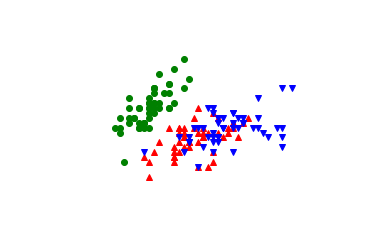

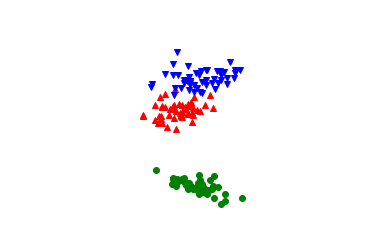

In [19]:
import matplotlib.pyplot as plt
newData, w = lda(iris, labels, 2)
print(np.shape(newData))
plt.plot(iris[w0, 0], iris[w0, 1], 'ok', color='green')
plt.plot(iris[w1, 0], iris[w1, 1], '^k', color = 'red')
plt.plot(iris[w2, 0], iris[w2, 1], 'vk', color = 'blue')
plt.axis([-1.5, 1.8, -1.5, 1.8])
plt.axis('off')
plt.show()

plt.figure(2)
plt.plot(newData[w0, 0], newData[w0, 1], 'ok', color='green')
plt.plot(newData[w1, 0], newData[w1, 1], '^k', color = 'red')
plt.plot(newData[w2, 0], newData[w2, 1], 'vk', color = 'blue')
plt.axis([-1.5, 1.8, -1.5, 1.8])
plt.axis('off')

plt.show()

## Principal Component Analysis algorithm

In [25]:
def pca(data, nRedDim=0, normalise=1):
    #center data
    m = np.mean(data, axis=0)
    data -= m
    
    #covariance matrix
    C = np.cov(data.T)
    
    #compute eigenvalues and sort into descending order
    evals, evecs = np.linalg.eig(C)
    indices = np.argsort(evals)
    indices = indices[::-1]
    evecs = evecs[:, indices]
    evals = evals[indices]
    
    if nRedDim>0:
        evecs = evecs[:,:nRedDim]
    
    if normalise:
        for i in range(np.shape(evecs)[1]):
            evecs[:,i]=evecs[:, i] / np.linalg.norm(evecs[:, i]) * np.sqrt(evals[i])
    #produce the new matrix
    x = np.dot(evecs.T, data.T)
    #compute the original data again
    y = np.dot(evecs, x).T + m
    return x, y, evals, evecs
    
    


(-0.49656969536619744,
 0.5518339758573664,
 -0.1963728556618137,
 0.21903650027269797)

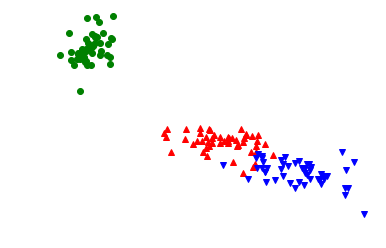

In [26]:
x, y, evals, evecs = pca(iris,2)
plt.figure()
plt.plot(y[w0,0],y[w0,1],'ok', color = 'green')
plt.plot(y[w1,0],y[w1,1],'^k', color = 'red')
plt.plot(y[w2,0],y[w2,1],'vk', color = 'blue')
plt.axis('off')

## Factor Analysis algorithm

In [1]:
def factoranalysis(y, nRedDim):
    Ndata = np.shape(y)[0]
    N = np.shape(y)[1]
    
    y = y - y.mean(axis = 0)
    C = np.cov(y.T)
    Cd = C.diagonal()
    Psi = Cd
    scaling = np.linalg.det(C)**(1./N)
    
    W = np.random.normal(0, np.sqrt(scaling/nRedDim), (N, nRedDim))
    
    nits = 1000
    oldL = -np.inf
    
    for i in range(nits):
        A = np.dot(W, W.T) + np.diag(Psi)
        logA = np.log(np.abs(np.linalg.det(A)))
        A = np.linalg.inv(A)
        
        WA = np.dot(W.T, A)
        WAC = np.dot(WA, C)
        Exx = np.eye(nRedDim) - np.dot(WA,W) +  np.dot(WAC, WA.T)
        
        W = np.dot(WAC.T, np.linalg.inv(Exx))
        Psi = Cd - (np.dot(W, WAC)).diagonal()
        
        tAC = (A*C.T).sum()
        L = -N/2*np.log(2.*np.pi) - 0.5*logA - 0.5*tAC
        if (L - oldL)<(1e-4):
            print("stop", i)
            break
        print(L)
        oldL = L
    A = np.linalg.inv(np.dot(W, W.T)) + np.diag(Psi)
    Ex = np.dot(A.T, W)
    
    return np.dot(y, Ex)    

-2.557366014229669
-2.1701039318072497
-1.6375791733574998
-1.1280489701460232
-0.7934371765418105
-0.6016537817513812
-0.48754020293591704
-0.4181809304209585
-0.37366838341742925
-0.3427760148923058
-0.3202425099437538
-0.30352348458704626
-0.2910402638165004
-0.2815998486533662
-0.2742949381770008
-0.26847985898261406
-0.2637191271532151
-0.25972527527098066
-0.25630743991358784
-0.25333590927514393
-0.2507196820058004
-0.24839273142419094
-0.24630562364425135
-0.2444203227346473
-0.24270688502505955
-0.2411412877461503
-0.23970395489679452
-0.2383787244295803
-0.23715210380183782
-0.236012719995208
-0.23495090460594303
-0.23395837525567176
-0.23302798727931195
-0.2321535377022359
-0.2313296087778376
-0.23055144188647025
-0.2298148350277227
-0.22911605884906283
-0.22845178738317706
-0.2278190405636935
-0.227215136254161
-0.22663765002463698
-0.22608438128857067
-0.22555332470393674
-0.22504264596602574
-0.22455066129432666
-0.22407582005246418
-0.22361669004649665
-0.223171945131410

(-8.256849031477357, 8.332985392845211, -14.61439781265233, 10.136878965856404)

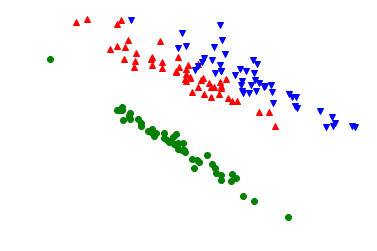

In [27]:
newData = factoranalysis(iris, 2)
plt.figure()
plt.plot(newData[w0,0],newData[w0,1],'ok', color = 'green')
plt.plot(newData[w1,0],newData[w1,1],'^k', color = 'red')
plt.plot(newData[w2,0],newData[w2,1],'vk', color = 'blue')
plt.axis('off')

## Kernal PCA algorithm

In [7]:
def kernelmatrix(data, kernel, param = np.array([3,2])):
    if kernel == 'linear':
        return data@data.T
    elif kernel == 'gaussian':
        K = np.zeros((np.shape(data)[0], np.shape(data)[0]))
        for i in range(np.shape(data)[0]):
            for j in range(i + 1, np.shape(data)[0]):
                K[i,j] = np.sum((data[i,:]-data[j,:])** 2) #total spread between each row against another row
                K[j,i] =  K[i, j] #to ensure it's symmetric
        return np.exp(-K**2/(2*param[0]**2)) #applying the gaussian
    elif kernel == 'polynomial':
        return (data@data.T + param[0])**param[1]

def kernelpca(data,kernel, redDim):
    
    nData = np.shape(data)[0]
    nDim = np.shape(data)[1]
    
    K = kernelmatrix(data, kernel)
    
    D = np.sum(K, axis =0)/nData
    E = np.sum(D)/nData
    J = np.ones((nData,1))*D
    K = K - J - J.T + E*np.ones((nData, nData))
    
    evals, evecs = np.linalg.eig(K)
    indices = np.argsort(evals)
    indices = indices[::-1]
    evecs = evecs[:, indices[:redDim]]
    evals = evals[indices[:redDim]]
    
    sqrtE = np.zeros((len(evals), len(evals)))
    for i in range(len(evals)):
        sqrtE[i,i] = np.sqrt(evals[i])
    
    newData = (sqrtE@evecs.T).T
    
    return newData
    
    
                 

(-0.8021360432876077,
 0.835978829586594,
 -0.5768383294609707,
 0.5736521252625557)

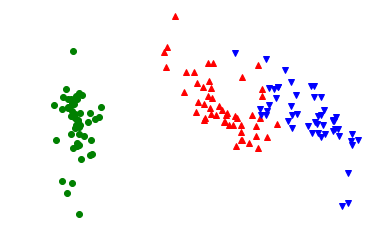

In [24]:
newData = kernelpca(iris,'gaussian',2)
plt.figure()
plt.plot(newData[w0,0],newData[w0,1],'ok', color = 'green')
plt.plot(newData[w1,0],newData[w1,1],'^k', color = 'red')
plt.plot(newData[w2,0],newData[w2,1],'vk', color = 'blue')
plt.axis('off')

# Locally Linear Embedding algorithm

In [33]:

def lle(data, nRedDim=2, K=12):
    ndata = np.shape(data)[0]
    ndim = np.shape(data)[1]
    d = np.zeros((ndata, ndata), dtype=float)
    
    for i in range(ndata):
        for j in range(i + 1, ndata):
            for k in range(ndim):
                d[i,j] += (data[i,k]-data[j,k])**2 
            d[i,j] = np.sqrt(d[i,j]) #compute distance b/w every pair of points
            d[j,i] = d[i,j] #ensures d matrix is square and symmetric, and hence invertible
    
    indices = d.argsort(axis=1)
    neighbors = indices[:, 1:K+1] #creating a list of its neighbors' locations zi
    
    W = np.zeros((K, ndata), dtype = float)
    
    for i in range(ndata):
        Z = data[neighbors[i, :],:] - np.kron(np.ones((K, 1)), data[i,:]) #compute zi-=zi-xi
        C = Z@Z.T #compute local covariance
        C = C + np.identity(K)*1e-3*np.trace(C)
        W[:,i] = (np.linalg.solve(C,np.ones((K,1)))).T #solve for W that minimizes the reconstruction error
        W[:,i] = W[:,i]/np.sum(W[:, i]) #normalize the Ws of neighbor elements
    
    M = np.eye(ndata, dtype =float)
    for i in range(ndata):
        w = (np.ones((1, np.shape(W)[0]))*W[:,i].T).T
        j = neighbors[i,:]
        ww = w@w.T
        for k in range(K): #creating M = (I - W).T@(I - W)
            M[i,j[k]] -= w[k]
            M[j[k], i] -= w[k]
            for l in range(K):
                M[j[k],j[l]] += ww[k,l]
    
    evals, evecs = np.linalg.eig(M) #compute eigenvalues/eigenvectors of M
    ind = np.argsort(evals) 
    y = evecs[:, ind[1:nRedDim+1]]*np.sqrt(ndata) #sort the eigvectors into order by size of eigenvalue
    return evals, evecs, y

(150, 2)
[[[-8.28606881e-01  5.50030390e-10]
  [-8.28606881e-01  4.77900981e-10]
  [-8.28606881e-01  4.64341444e-10]
  [-8.28606881e-01  5.64240565e-10]
  [-8.28606881e-01  5.44785365e-10]
  [-8.28606881e-01  4.99565566e-10]
  [-8.28606881e-01  4.90528252e-10]
  [-8.28606881e-01  5.32383425e-10]
  [-8.28606881e-01  5.05836341e-10]
  [-8.28606881e-01  5.08389564e-10]
  [-8.28606881e-01  5.15153632e-10]
  [-8.28606881e-01  4.57543381e-10]
  [-8.28606881e-01  5.50386541e-10]
  [-8.28606881e-01  4.66867613e-10]
  [-8.28606881e-01  4.17570664e-10]
  [-8.28606881e-01  4.64484288e-10]
  [-8.28606881e-01  5.64104702e-10]
  [-8.28606881e-01  4.07525227e-10]
  [-8.28606881e-01  4.43511049e-10]
  [-8.28606881e-01  3.68289656e-10]
  [-8.28606881e-01  5.72371242e-10]
  [-8.28606881e-01  5.01152311e-10]
  [-8.28606881e-01  6.32134993e-10]
  [-8.28606881e-01  5.07925018e-10]
  [-8.28606881e-01  5.00561769e-10]
  [-8.28606881e-01  5.05294518e-10]
  [-8.28606881e-01  4.80517569e-10]
  [-8.28606881e-01 

(-1.0878471305145783,
 -0.8162621068398246,
 -2.8421680863772463,
 3.7115910235064318)

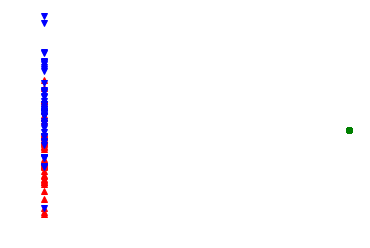

In [34]:
a,b,newData = lle(iris,2,12)
print(np.shape(newData))
print(newData[w0,:])
print("---")
print(newData[w1,:])
print("---")
print(newData[w2,:])

plt.plot(newData[w0,0],newData[w0,1],'ok', color = 'green')
plt.plot(newData[w1,0],newData[w1,1],'^k', color = 'red')
plt.plot(newData[w2,0],newData[w2,1],'vk', color = 'blue')
plt.axis('off')